In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
### Create the Bidirectional LSTM model
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
df=pd.read_csv('train-2 copy.csv',parse_dates=True)
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==1097]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1
1016076,1097,3,2013-01-02,6688,1819,1,0,0,1
1014961,1097,4,2013-01-03,7053,1803,1,0,0,1
1013846,1097,5,2013-01-04,6430,1799,1,0,0,1
1012731,1097,6,2013-01-05,5460,1390,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5556,1097,1,2015-07-27,10874,2357,1,1,0,1
4441,1097,2,2015-07-28,10225,2334,1,1,0,1
3326,1097,3,2015-07-29,10053,2296,1,1,0,1
2211,1097,4,2015-07-30,10324,2346,1,1,0,1
1096,1097,5,2015-07-31,11443,2451,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1017190 to 1096
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,1097.0,3.997877,9744.599788,2420.921444,1.0,0.382166,0.159236
std,0.0,1.998404,1900.891959,329.306198,0.0,0.486175,0.366090
min,1097.0,1.000000,5460.000000,1055.000000,1.0,0.000000,0.000000
25%,1097.0,2.000000,8486.250000,2245.750000,1.0,0.000000,0.000000
50%,1097.0,4.000000,9603.000000,2460.000000,1.0,0.000000,0.000000
75%,1097.0,6.000000,10768.750000,2619.000000,1.0,1.000000,0.000000
max,1097.0,7.000000,17039.000000,3804.000000,1.0,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

10690    3
10428    3
11166    3
11030    3
9861     3
        ..
9901     1
10185    1
10521    1
6835     1
11443    1
Name: Sales, Length: 870, dtype: int64

In [16]:
atr2=atr2.set_index('Date')

In [17]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1097,2,5961,1405,1,0,a,1
2013-01-02,1097,3,6688,1819,1,0,0,1
2013-01-03,1097,4,7053,1803,1,0,0,1
2013-01-04,1097,5,6430,1799,1,0,0,1
2013-01-05,1097,6,5460,1390,1,0,0,0


In [18]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [19]:
atr2.head()

,Sales
Date,
2013-01-01,5961
2013-01-02,6688
2013-01-03,7053
2013-01-04,6430
2013-01-05,5460


In [20]:
atr2.tail()

,Sales
Date,
2015-07-27,10874
2015-07-28,10225
2015-07-29,10053
2015-07-30,10324
2015-07-31,11443


<AxesSubplot:xlabel='Date'>

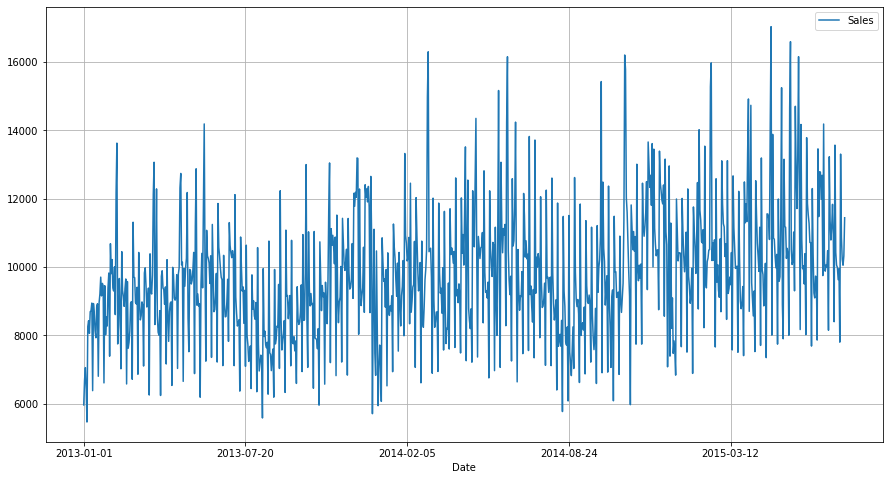

In [21]:
atr2.plot(figsize=(15,8), grid=True)

In [22]:
df1=atr2.reset_index()['Sales']

In [23]:
df1.shape

(942,)

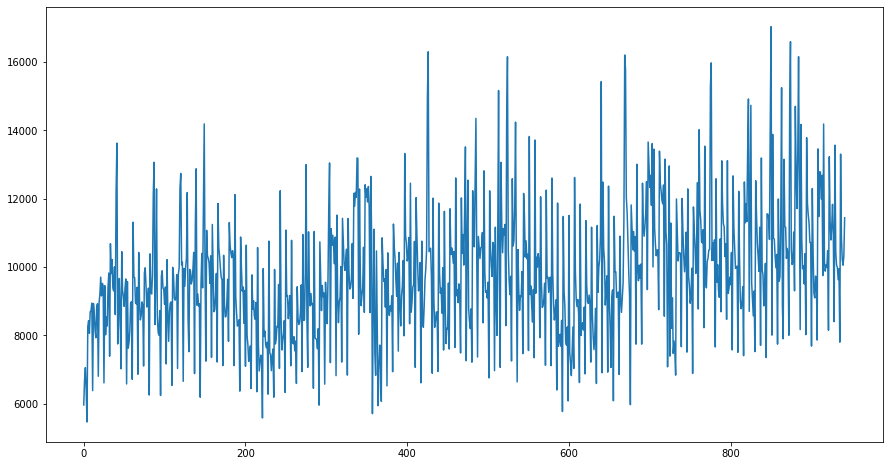

In [24]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.52163399],
       [0.55302703],
       [0.56878832],
       [0.54188617],
       [0.5       ],
       [0.62082218],
       [0.62807669],
       [0.61214267],
       [0.63951982],
       [0.64077209],
       [0.65044477],
       [0.53968391],
       [0.64984023],
       [0.63740392],
       [0.61564038],
       [0.60657224],
       [0.64569479],
       [0.64958114],
       [0.55786337],
       [0.65104931],
       [0.66210381],
       [0.6832628 ],
       [0.65951291],
       [0.67536057],
       [0.67255376],
       [0.54948614],
       [0.67238103],
       [0.61037223],
       [0.63282667],
       [0.62142672],
       [0.66970377],
       [0.6884446 ],
       [0.58329735],
       [0.72553761],
       [0.68762415],
       [0.70550134],
       [0.66957423],
       [0.66573106],
       [0.69621729],
       [0.63589256],
       [0.79005095],
       [0.85275067],
       [0.59875637],
       [0.62263581],
       [0.68153554],
       [0.64439934],
       [0.56732015],
       [0.715

In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(612, 330)

In [29]:
print(train_data)
print('\n')
print(atr2.iloc[0:612]) #train

[[0.52163399]
 [0.55302703]
 [0.56878832]
 [0.54188617]
 [0.5       ]
 [0.62082218]
 [0.62807669]
 [0.61214267]
 [0.63951982]
 [0.64077209]
 [0.65044477]
 [0.53968391]
 [0.64984023]
 [0.63740392]
 [0.61564038]
 [0.60657224]
 [0.64569479]
 [0.64958114]
 [0.55786337]
 [0.65104931]
 [0.66210381]
 [0.6832628 ]
 [0.65951291]
 [0.67536057]
 [0.67255376]
 [0.54948614]
 [0.67238103]
 [0.61037223]
 [0.63282667]
 [0.62142672]
 [0.66970377]
 [0.6884446 ]
 [0.58329735]
 [0.72553761]
 [0.68762415]
 [0.70550134]
 [0.66957423]
 [0.66573106]
 [0.69621729]
 [0.63589256]
 [0.79005095]
 [0.85275067]
 [0.59875637]
 [0.62263581]
 [0.68153554]
 [0.64439934]
 [0.56732015]
 [0.71551947]
 [0.66668106]
 [0.65847655]
 [0.64629934]
 [0.66866742]
 [0.680931  ]
 [0.54814751]
 [0.67764919]
 [0.59344503]
 [0.60082909]
 [0.61499266]
 [0.65048795]
 [0.6522584 ]
 [0.55406339]
 [0.75269885]
 [0.68352189]
 [0.68248553]
 [0.65126522]
 [0.64936523]
 [0.67043786]
 [0.56045427]
 [0.71448312]
 [0.65186976]
 [0.62919941]
 [0.63

In [30]:
print(test_data)
print('\n')
print(atr2.iloc[612:])  #test

[[0.63662665]
 [0.55000432]
 [0.77571466]
 [0.60950859]
 [0.62203126]
 [0.62561534]
 [0.61641765]
 [0.64539252]
 [0.56084291]
 [0.75468521]
 [0.67259694]
 [0.6522584 ]
 [0.64996977]
 [0.66059245]
 [0.64880387]
 [0.57578375]
 [0.74639433]
 [0.63615165]
 [0.60791087]
 [0.59158822]
 [0.60955177]
 [0.6437948 ]
 [0.54875205]
 [0.74842387]
 [0.66404698]
 [0.69556957]
 [0.70524225]
 [0.73430348]
 [0.93060713]
 [0.56231108]
 [0.80348044]
 [0.71979446]
 [0.70295362]
 [0.64794024]
 [0.67242422]
 [0.68494689]
 [0.56313153]
 [0.79838501]
 [0.65066068]
 [0.61948355]
 [0.5690906 ]
 [0.65709474]
 [0.6670697 ]
 [0.52685897]
 [0.76021245]
 [0.69004232]
 [0.69004232]
 [0.65756974]
 [0.66067882]
 [0.66434925]
 [0.56028154]
 [0.73512393]
 [0.65476293]
 [0.63865619]
 [0.65726747]
 [0.67566284]
 [0.75533293]
 [0.96420244]
 [0.94589343]
 [0.78378962]
 [0.7650488 ]
 [0.72592625]
 [0.68943778]
 [0.65886519]
 [0.52193626]
 [0.77454875]
 [0.74591934]
 [0.71802401]
 [0.74099663]
 [0.71612402]
 [0.73460575]
 [0.59

In [31]:
len(train_data), len(test_data)

(612, 330)

In [32]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train)

[[0.52163399 0.55302703 0.56878832 ... 0.69129459 0.66957423 0.66737197]
 [0.55302703 0.56878832 0.54188617 ... 0.66957423 0.66737197 0.6489766 ]
 [0.56878832 0.54188617 0.5        ... 0.66737197 0.6489766  0.67086968]
 ...
 [0.56498834 0.74639433 0.65476293 ... 0.620304   0.56770878 0.80922359]
 [0.74639433 0.65476293 0.60955177 ... 0.56770878 0.80922359 0.68991277]
 [0.65476293 0.60955177 0.73780119 ... 0.80922359 0.68991277 0.65592884]]


In [35]:
print(y_train)

[0.6489766  0.67086968 0.57340876 0.70532861 0.6358062  0.60203817
 0.639563   0.65027204 0.65195613 0.5462907  0.69565593 0.68615597
 0.65679247 0.65411521 0.65839019 0.68624234 0.56779515 0.68719233
 0.69526729 0.79609638 0.81440539 0.69880819 0.70221954 0.55142931
 0.69410139 0.67177649 0.69522411 0.70714224 0.79026686 0.6310994
 0.58895414 0.69302185 0.69142413 0.6745833  0.67907419 0.69276276
 0.7145263  0.56123154 0.74799205 0.82027809 0.64776751 0.66201745
 0.64677433 0.64953796 0.53139304 0.67376285 0.71327403 0.66974696
 0.77079195 0.87701874 0.68999914 0.57699283 0.74246481 0.71003541
 0.7070127  0.70131272 0.6752742  0.71016495 0.58174281 0.74989205
 0.69755592 0.63951982 0.64219708 0.65955609 0.6879696  0.57587011
 0.77636238 0.72104672 0.70977632 0.69470593 0.6830469  0.68002418
 0.57133604 0.71081268 0.64858796 0.63295621 0.63364712 0.65217204
 0.68058554 0.60203817 0.75222385 0.7232058  0.71370585 0.70787633
 0.71677174 0.71059677 0.57129286 0.7875896  0.65817428 0.63770

In [36]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [38]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [39]:
X_train.shape

(511, 1, 100)

In [40]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model=Sequential()
model.add(Bidirectional(SimpleRNN(units=32, input_shape=(1,100), activation="relu")))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

2022-03-25 00:10:00.713621: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 00:10:00.714771: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 4s 7ms/sample - loss: 3.5590 - mape: 242.0065 - val_loss: 0.0286 - val_mape: 18.7569
Epoch 2/150
511/511 [==============================] - 0s 184us/sample - loss: 0.2102 - mape: 64.4962 - val_loss: 0.2645 - val_mape: 71.7672
Epoch 3/150
511/511 [==============================] - 0s 184us/sample - loss: 0.1086 - mape: 45.2051 - val_loss: 0.0111 - val_mape: 12.1741
Epoch 4/150
511/511 [==============================] - 0s 183us/sample - loss: 0.0219 - mape: 17.4780 - val_loss: 0.0451 - val_mape: 24.9790
Epoch 5/150
511/511 [==============================] - 0s 184us/sample - loss: 0.0290 - mape: 20.7340 - val_loss: 0.0160 - val_mape: 13.1983
Epoch 6/150
511/511 [==============================] - 0s 181us/sample - loss: 0.0112 - mape: 12.9290 - val_loss: 0.0153 - val_mape: 14.8365
Epoch 7/150
511/511 [==============================] - 0s 184us/sample - loss: 0.0127 - mape: 13.9533 - val_l

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8512      
_________________________________________________________________
dense (Dense)                multiple                  520       
_________________________________________________________________
dense_1 (Dense)              multiple                  9         
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________


In [44]:
modela=Sequential()
modela.add(Bidirectional(SimpleRNN(units=64, input_shape=(1,100), activation="relu")))
modela.add(Dense(16, activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [45]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 7ms/sample - loss: 0.0631 - mape: 32.2169 - val_loss: 0.0246 - val_mape: 19.7807
Epoch 2/150
511/511 [==============================] - 0s 213us/sample - loss: 0.0157 - mape: 14.8422 - val_loss: 0.0150 - val_mape: 14.9244
Epoch 3/150
511/511 [==============================] - 0s 232us/sample - loss: 0.0110 - mape: 13.0205 - val_loss: 0.0106 - val_mape: 10.2809
Epoch 4/150
511/511 [==============================] - 0s 257us/sample - loss: 0.0072 - mape: 10.2546 - val_loss: 0.0086 - val_mape: 9.6610
Epoch 5/150
511/511 [==============================] - 0s 209us/sample - loss: 0.0067 - mape: 9.6472 - val_loss: 0.0083 - val_mape: 10.1457
Epoch 6/150
511/511 [==============================] - 0s 218us/sample - loss: 0.0057 - mape: 8.6638 - val_loss: 0.0081 - val_mape: 10.2480
Epoch 7/150
511/511 [==============================] - 0s 206us/sample - loss: 0.0056 - mape: 8.8700 - val_loss: 

In [46]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  21120     
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
!pip install -q -U keras-tuner

In [49]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [50]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(hp.Int('Bidirectional_RNN_i_input_unit',min_value=16,max_value=160,step=16),return_sequences=True,input_shape=(1,100))))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(SimpleRNN(hp.Int(f'rnn_{i}_units',min_value=16,max_value=160,step=16),return_sequences=True)))
    model.add(Bidirectional(SimpleRNN(hp.Int('layer_2_neurons',min_value=16,max_value=160,step=16)))) 
    model.add(Dense(hp.Int(f'dense_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mape'])
    return model
                                             

In [51]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='prostud2',
        project_name='Rossmann forecasting'
        )

In [52]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
Bidirectional_RNN_i_input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
dense_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [53]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 01m 29s]
mape: 10.088603019714355

Best mape So Far: 8.875670433044434
Total elapsed time: 00h 08m 38s
INFO:tensorflow:Oracle triggered exit


In [54]:
tuner.results_summary()

Results summary
Results in prostud2/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 16
n_layers: 3
rnn_0_units: 16
layer_2_neurons: 16
dense_0_units: 80
Dropout_rate: 0.30000000000000004
learning_rate: 0.01
rnn_1_units: 16
rnn_2_units: 16
dense_2_units: 16
Score: 8.875670433044434
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 80
n_layers: 3
rnn_0_units: 16
layer_2_neurons: 80
dense_0_units: 192
Dropout_rate: 0.0
learning_rate: 0.01
rnn_1_units: 96
rnn_2_units: 144
dense_2_units: 96
dense_1_units: 80
Score: 8.923239707946777
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 112
n_layers: 1
rnn_0_units: 144
layer_2_neurons: 112
dense_0_units: 32
Dropout_rate: 0.1
learning_rate: 0.0001
rnn_1_units: 128
rnn_2_units: 128
dense_2_units: 32
dense_1_units: 144
Score: 10.088603019714355
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 64
n_layers: 3
rnn_0_units: 112
layer_2_neurons: 112
dense_

In [55]:
from tensorflow.keras import optimizers

In [56]:
modelcc1=Sequential()
modelcc1.add(Bidirectional(SimpleRNN(16, return_sequences=True, input_shape=(1,100))))
modelcc1.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(16)))
modelcc1.add(Dense(80, activation='relu'))
modelcc1.add(Dropout(0.3))
modelcc1.add(Dense(16, activation='relu'))
modelcc1.add(Dense(1))
sgd=optimizers.SGD(lr=0.01)
modelcc1.compile(loss='mse',optimizer='adam', metrics=['mape'])

In [57]:
modelcc1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 15s 30ms/sample - loss: 0.1447 - mape: 44.2605 - val_loss: 0.0251 - val_mape: 17.6156
Epoch 2/150
511/511 [==============================] - 0s 456us/sample - loss: 0.0310 - mape: 20.3088 - val_loss: 0.0103 - val_mape: 10.2105
Epoch 3/150
511/511 [==============================] - 0s 456us/sample - loss: 0.0241 - mape: 18.4146 - val_loss: 0.0081 - val_mape: 8.7832
Epoch 4/150
511/511 [==============================] - 0s 460us/sample - loss: 0.0166 - mape: 14.8585 - val_loss: 0.0117 - val_mape: 10.8795
Epoch 5/150
511/511 [==============================] - 0s 501us/sample - loss: 0.0142 - mape: 14.0175 - val_loss: 0.0209 - val_mape: 16.5142
Epoch 6/150
511/511 [==============================] - 0s 474us/sample - loss: 0.0138 - mape: 13.7747 - val_loss: 0.0173 - val_mape: 14.5581
Epoch 7/150
511/511 [==============================] - 0s 453us/sample - loss: 0.0124 - mape: 12.9758 - val_l

In [58]:
modelcc1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection multiple                  3744      
_________________________________________________________________
bidirectional_4 (Bidirection multiple                  1568      
_________________________________________________________________
bidirectional_5 (Bidirection multiple                  1568      
_________________________________________________________________
bidirectional_6 (Bidirection multiple                  1568      
_________________________________________________________________
bidirectional_7 (Bidirection multiple                  1568      
_________________________________________________________________
dense_2 (Dense)              multiple                  2640      
_________________________________________________________________
dropout_1 (Dropout)          multiple                 

In [59]:
#Lets Do the prediction and check performance metrics
train_predict=modelcc1.predict(X_train)
test_predict=modelcc1.predict(X_test)

In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7435.395406108498

In [62]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

7854.366224296342

In [63]:
print(test_predict)

[[11014.938 ]
 [ 8633.253 ]
 [ 8707.115 ]
 [ 8458.148 ]
 [ 8515.593 ]
 [ 8593.345 ]
 [ 6733.9443]
 [ 9933.494 ]
 [ 8511.127 ]
 [ 8511.891 ]
 [ 7871.8794]
 [ 6905.941 ]
 [ 7649.041 ]
 [ 5630.9146]
 [ 9711.593 ]
 [ 8391.364 ]
 [ 8325.046 ]
 [ 8379.575 ]
 [ 8087.046 ]
 [ 7368.5273]
 [ 5628.2104]
 [ 9382.104 ]
 [ 6984.458 ]
 [ 6769.467 ]
 [ 7388.3213]
 [ 7788.146 ]
 [ 7671.5366]
 [ 5172.642 ]
 [ 8931.0205]
 [ 7927.424 ]
 [ 7139.024 ]
 [ 7406.963 ]
 [ 7787.3013]
 [ 9473.577 ]
 [ 5625.2275]
 [ 9455.509 ]
 [ 7489.7603]
 [ 6702.695 ]
 [ 6876.0884]
 [ 6988.429 ]
 [ 7692.204 ]
 [ 5863.8276]
 [ 9085.178 ]
 [ 7204.814 ]
 [ 7251.247 ]
 [ 7286.5405]
 [ 7095.1406]
 [ 7334.4985]
 [ 5468.946 ]
 [ 9820.762 ]
 [ 7674.243 ]
 [ 6940.4185]
 [ 7181.727 ]
 [ 7273.629 ]
 [ 8186.5977]
 [ 5891.5557]
 [10689.354 ]
 [ 7805.345 ]
 [ 7513.975 ]
 [ 7022.0923]
 [ 7825.4424]
 [ 7831.2563]
 [ 5351.731 ]
 [10219.071 ]
 [ 8399.215 ]
 [ 8312.641 ]
 [ 7100.499 ]
 [ 7139.983 ]
 [ 7455.397 ]
 [ 5027.189 ]
 [ 9097.169 ]
 [ 772

In [64]:
len(train_predict)

511

In [65]:
len(test_predict)

229

In [66]:
test_data.shape

(330, 1)

In [67]:
test_predict.shape

(229, 1)

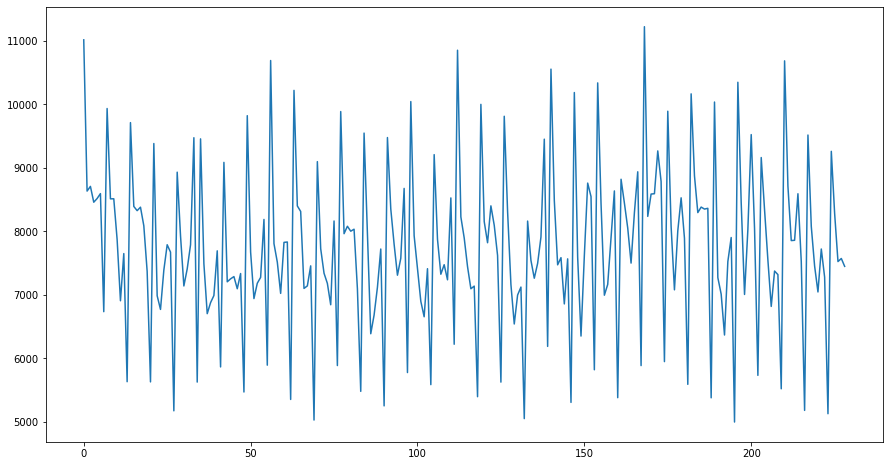

In [68]:
plt.plot(test_predict)

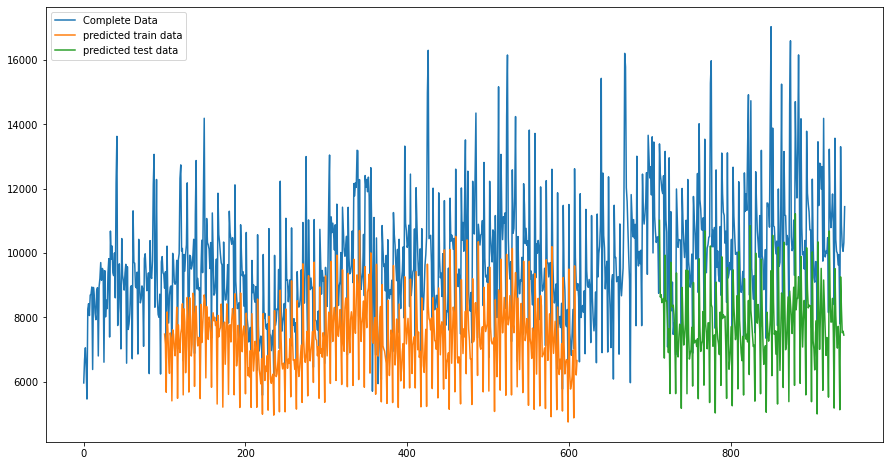

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [70]:
len(test_data)


330

In [71]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [72]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [73]:
temp_input #All my test_data is present here (previous 100 days data)

[0.6643924345798429,
 0.7007081785991882,
 0.5814405389066413,
 0.7632783487347785,
 0.7630192590033682,
 0.7575783746437517,
 0.7308489506865878,
 0.878314189480957,
 1.0,
 0.6099404093617756,
 0.8638483461438812,
 0.7324466706969514,
 0.7312375852837032,
 0.7097331375766474,
 0.6950082045081614,
 0.7120217635374384,
 0.5985404611797218,
 0.7820623542620261,
 0.6780810087226876,
 0.6836514379480093,
 0.7591329130322135,
 0.9228344416616289,
 0.6482425079886001,
 0.60527679419639,
 0.8323257621556266,
 0.7473443302530443,
 0.7462647897055013,
 0.7069695137749374,
 0.7196217289921409,
 0.7111149494775024,
 0.6097676828741687,
 0.8967959236548925,
 0.9810432679851455,
 0.7180671906036791,
 0.6992400034545297,
 0.7036877105104067,
 0.7403489075049658,
 0.6659469729683047,
 0.8993436393470939,
 0.8158303825891701,
 0.7700146817514466,
 0.8371189221867174,
 0.962086535970291,
 0.7823646256153381,
 0.6169790137317557,
 0.8763278348734779,
 0.7306330425770792,
 0.6938854823387166,
 0.69777182

In [74]:
len(temp_input)

100

In [75]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.6418066]
101
1 day input [0.70070818 0.58144054 0.76327835 0.76301926 0.75757837 0.73084895
 0.87831419 1.         0.60994041 0.86384835 0.73244667 0.73123759
 0.70973314 0.6950082  0.71202176 0.59854046 0.78206235 0.67808101
 0.68365144 0.75913291 0.92283444 0.64824251 0.60527679 0.83232576
 0.74734433 0.74626479 0.70696951 0.71962173 0.71111495 0.60976768
 0.89679592 0.98104327 0.71806719 0.69924    0.70368771 0.74034891
 0.66594697 0.89934364 0.81583038 0.77001468 0.83711892 0.96208654
 0.78236463 0.61697901 0.87632783 0.73063304 0.69388548 0.69777183
 0.67462648 0.71297176 0.61050177 0.85961655 0.77636238 0.76176699
 0.75127386 0.72713533 0.72678988 0.59607911 0.79527593 0.71249676
 0.66309699 0.6569652  0.68451507 0.68352189 0.60367907 0.84545298
 0.75982382 0.81660765 0.81600311 0.78210554 0.81211676 0.68520598
 0.8768892  0.7027809  0.69081959 0.69867864 0.69582866 0.71677174
 0.61611538 0.83547802 0.75498748 0.73020123 0.74730115 0.77532602
 0.73387166 0.62686761 0.85020295 

In [76]:
lst_output

[[0.6418066024780273],
 [0.8597797155380249],
 [0.7101902365684509],
 [0.7078381776809692],
 [0.784814715385437],
 [0.7786246538162231],
 [0.7329678535461426],
 [0.634718656539917],
 [0.8672112226486206],
 [0.712610125541687],
 [0.7121412754058838],
 [0.7433722615242004],
 [0.7738903760910034],
 [0.7304551005363464],
 [0.6715871691703796],
 [0.8547371029853821],
 [0.7037522792816162],
 [0.6829777359962463],
 [0.7363286018371582],
 [0.7973315715789795],
 [0.7462300658226013],
 [0.7067475914955139],
 [0.8278243541717529],
 [0.6654761433601379],
 [0.6624762415885925],
 [0.7259742021560669],
 [0.7362809777259827],
 [0.7048676609992981],
 [0.6741005778312683],
 [0.8506817817687988],
 [0.7444530725479126],
 [0.7418323755264282],
 [0.7601941823959351],
 [0.7448593974113464],
 [0.6872570514678955],
 [0.6274948716163635],
 [0.8095223903656006],
 [0.6989801526069641],
 [0.7200901508331299],
 [0.7734299302101135],
 [0.8213980197906494],
 [0.7470669150352478],
 [0.6583346128463745],
 [0.8266206979

In [77]:
len(lst_output)

80

In [78]:
fnl_output=scaler.inverse_transform(lst_output)

In [79]:
fnl_output

array([[ 8743.95730019],
       [13791.77865243],
       [10327.58549845],
       [10273.11651874],
       [12055.7391789 ],
       [11912.38973308],
       [10855.06955242],
       [ 8579.81464815],
       [13963.8774941 ],
       [10383.62528729],
       [10372.76765585],
       [11096.01483238],
       [11802.75332952],
       [10796.87921822],
       [ 9433.61566365],
       [13675.00183094],
       [10178.4952836 ],
       [ 9697.3984102 ],
       [10932.89776134],
       [12345.60453463],
       [11162.19586432],
       [10247.86072385],
       [13051.75639391],
       [ 9292.09652793],
       [ 9222.62480271],
       [10693.11057353],
       [10931.79488218],
       [10204.32529342],
       [ 9491.82118142],
       [13581.0887022 ],
       [11121.04425406],
       [11060.35415244],
       [11485.57687593],
       [11130.45392525],
       [ 9796.49879789],
       [ 8412.52623689],
       [12627.91951609],
       [10067.98237407],
       [10556.84771299],
       [11792.09032381],


In [80]:
len(fnl_output)

80

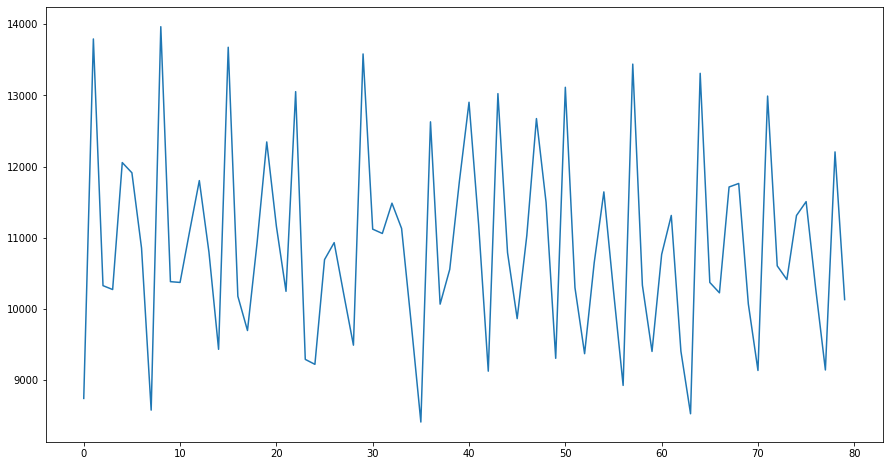

In [81]:
plt.plot(fnl_output)

In [82]:
import matplotlib.pyplot as plt

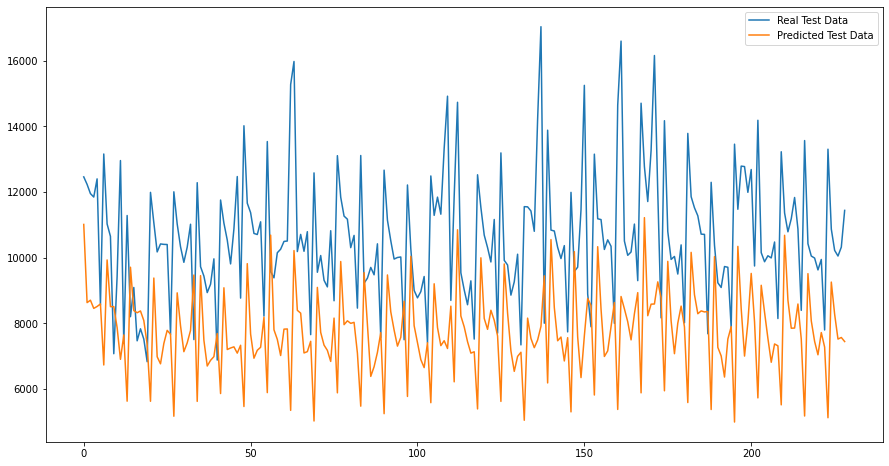

In [83]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [84]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [85]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [86]:
ff

,Forecast
0,8743.957300
1,13791.778652
2,10327.585498
3,10273.116519
4,12055.739179
...,...
75,11507.417748
76,10278.259607
77,9143.548781
78,12205.641024


In [87]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [88]:
ff

,Forecast,Time_Stamp
0,8743.957300,2015-08-01
1,13791.778652,2015-08-02
2,10327.585498,2015-08-03
3,10273.116519,2015-08-04
4,12055.739179,2015-08-05
...,...,...
75,11507.417748,2015-10-15
76,10278.259607,2015-10-16
77,9143.548781,2015-10-17
78,12205.641024,2015-10-18


In [89]:
ff=ff.set_index('Time_Stamp')

In [90]:
ff

,Forecast
Time_Stamp,
2015-08-01,8743.957300
2015-08-02,13791.778652
2015-08-03,10327.585498
2015-08-04,10273.116519
2015-08-05,12055.739179
...,...
2015-10-15,11507.417748
2015-10-16,10278.259607
2015-10-17,9143.548781


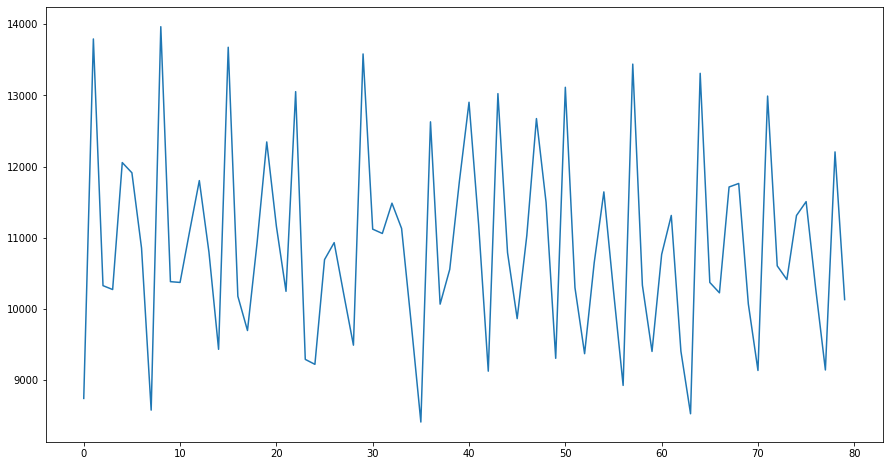

In [91]:
plt.plot(fnl_output)

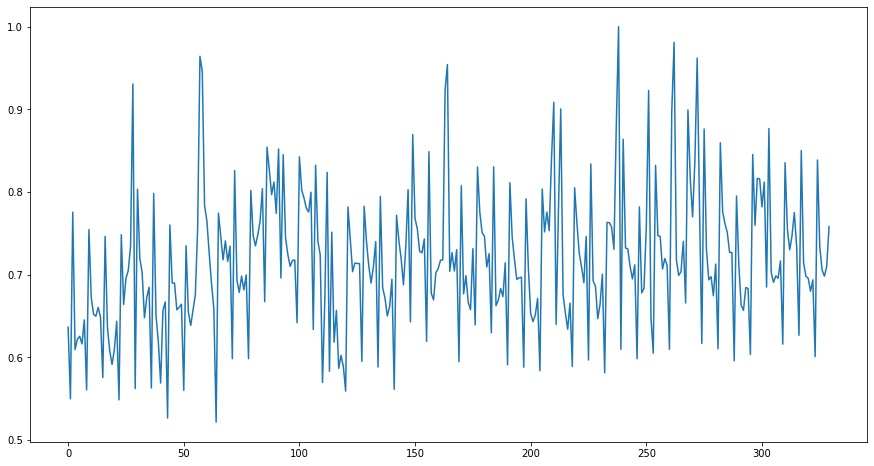

In [92]:
plt.plot(test_data)

In [93]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

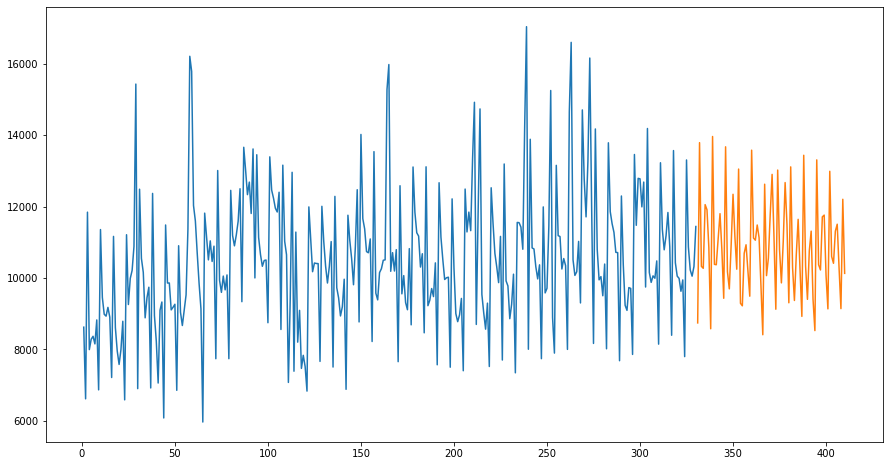

In [94]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [95]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

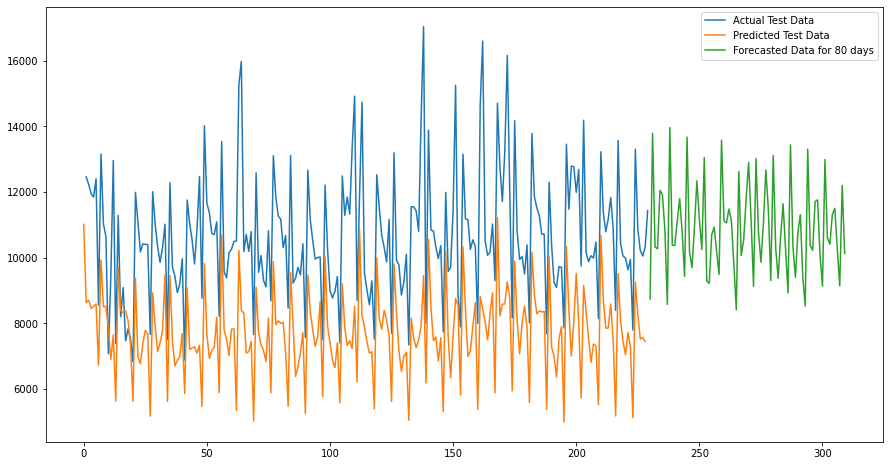

In [96]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [97]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,8469
2013-08-02,8959
2013-08-03,6347
2013-08-04,10569
2013-08-05,7749


In [98]:
vv.tail()

,Sales
Date,
2013-10-15,7903
2013-10-16,7874
2013-10-17,7607
2013-10-18,8196
2013-10-19,5955


In [99]:
len(vv)

80

In [100]:
jj=atr2.iloc[577:657]

In [101]:
jj.head()

,Sales
Date,
2014-08-01,9702
2014-08-02,7112
2014-08-03,12606
2014-08-04,9826
2014-08-05,8937


In [102]:
jj.tail()

,Sales
Date,
2014-10-15,7060
2014-10-16,9098
2014-10-17,9329
2014-10-18,6082
2014-10-19,11486


In [103]:
len(jj)

80

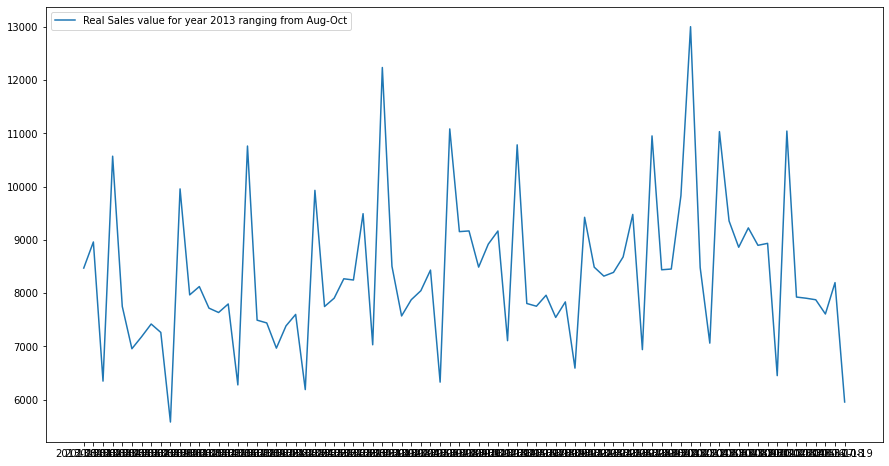

In [104]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

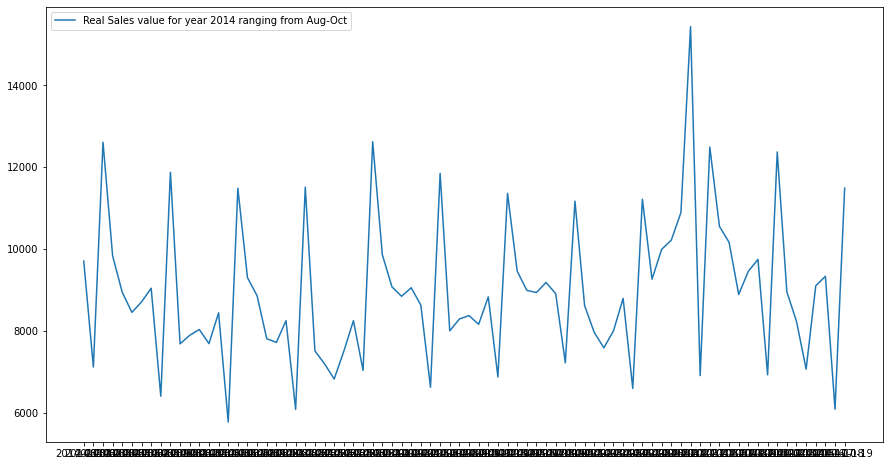

In [105]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [106]:
a1=vv.reset_index()['Sales']

In [107]:
a1

0      8469
1      8959
2      6347
3     10569
4      7749
      ...  
75     7903
76     7874
77     7607
78     8196
79     5955
Name: Sales, Length: 80, dtype: int64

In [108]:
len(a1)

80

In [109]:
b1=jj.reset_index()['Sales']

In [110]:
b1

0      9702
1      7112
2     12606
3      9826
4      8937
      ...  
75     7060
76     9098
77     9329
78     6082
79    11486
Name: Sales, Length: 80, dtype: int64

In [111]:
len(b1)

80

In [112]:
len(train_predict)

511

In [113]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,9417
2013-04-13,7160
2013-04-14,10215
2013-04-15,8605
2013-04-16,7823
...,...
2014-08-31,12621
2014-09-01,9858
2014-09-02,9071


In [114]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [115]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [116]:
njc

,Predicted Train Data
0,7480.271973
1,7167.546875
2,5671.349609
3,8168.199219
4,7635.835449
...,...
506,4873.772949
507,9601.291016
508,7512.320312
509,6207.492676


In [117]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [118]:
njc

,Predicted Train Data,time_Stamp
0,7480.271973,2013-04-12
1,7167.546875,2013-04-13
2,5671.349609,2013-04-14
3,8168.199219,2013-04-15
4,7635.835449,2013-04-16
...,...,...
506,4873.772949,2014-08-31
507,9601.291016,2014-09-01
508,7512.320312,2014-09-02
509,6207.492676,2014-09-03


In [119]:
njc=njc.set_index('time_Stamp')

In [120]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,7480.271973
2013-04-13,7167.546875
2013-04-14,5671.349609
2013-04-15,8168.199219
2013-04-16,7635.835449
...,...
2014-08-31,4873.772949
2014-09-01,9601.291016
2014-09-02,7512.320312


In [121]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,6822.914551
2013-08-02,7258.690918
2013-08-03,6983.941406
2013-08-04,5204.176270
2013-08-05,8570.366211
...,...
2013-10-15,7629.814453
2013-10-16,7323.723633
2013-10-17,7286.275391


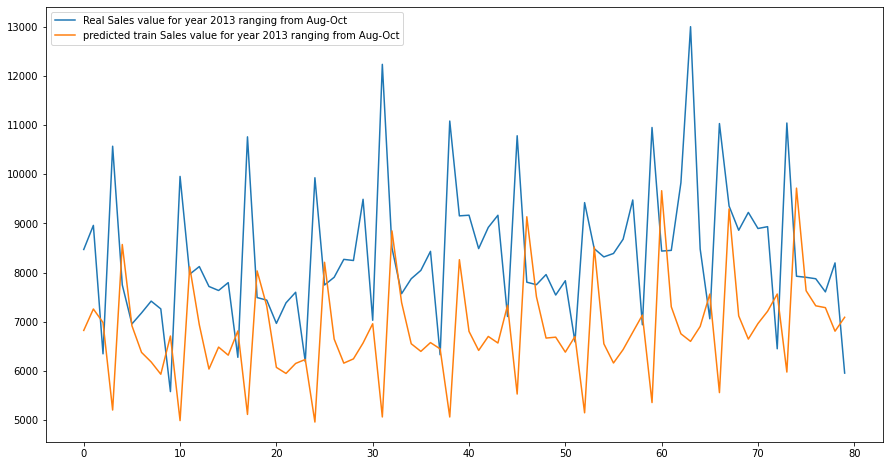

In [122]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [123]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

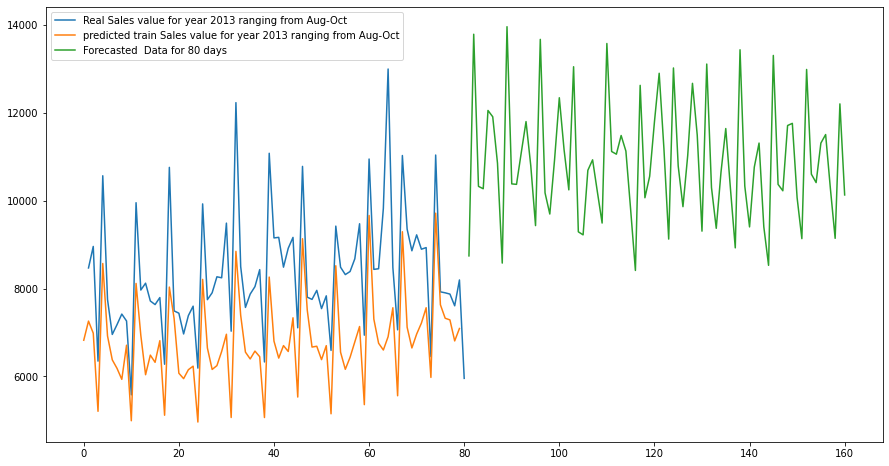

In [124]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [125]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,9702
2014-08-02,7112
2014-08-03,12606
2014-08-04,9826
2014-08-05,8937


In [126]:
nn.tail()

,Sales
Date,
2014-08-31,12621
2014-09-01,9858
2014-09-02,9071
2014-09-03,8841
2014-09-04,9050


In [127]:
len(nn)

35

In [128]:
c1=nn.reset_index()['Sales']

In [129]:
c1

0      9702
1      7112
2     12606
3      9826
4      8937
5      8448
6      8704
7      9038
8      6398
9     11874
10     7679
11     7887
12     8029
13     7683
14     8438
15     5767
16    11482
17     9296
18     8853
19     7804
20     7714
21     8245
22     6077
23    11509
24     7506
25     7190
26     6820
27     7496
28     8246
29     7028
30    12621
31     9858
32     9071
33     8841
34     9050
Name: Sales, dtype: int64

In [130]:
len(c1)

35

In [131]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,8110.225586
2014-08-02,7152.585449
2014-08-03,4911.395508
2014-08-04,10196.982422
2014-08-05,7436.323730
2014-08-06,6880.700195
2014-08-07,7401.525391
2014-08-08,7879.307129
2014-08-09,6713.546875


In [132]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

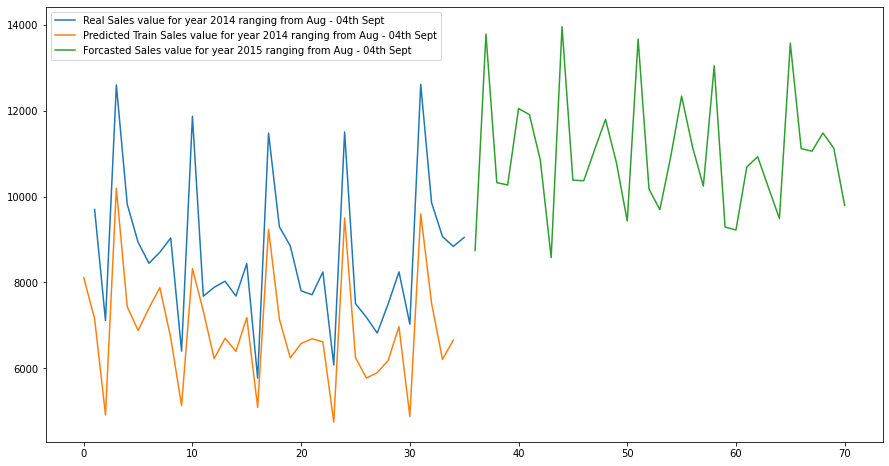

In [133]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [134]:
import jovian

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/bidirectional-rnn-store-1097


'https://jovian.ai/ismailzain1697/bidirectional-rnn-store-1097'